In [0]:
import cv2
import numpy as np
import dlib
from mlxtend.image import extract_face_landmarks
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from scipy.spatial import distance
import math
import os

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
cd '/content/drive/My Drive/Drowsiness/videos'

/content/drive/My Drive/Drowsiness/videos


In [0]:
!ls

1   11	13  15	17  19	20  22	24  26	28  3	31  33	35  4  6  8  data
10  12	14  16	18  2	21  23	25  27	29  30	32  34	36  5  7  9  frames


In [0]:
try:
    if not os.path.exists('data'):
        os.makedirs('data')
except OSError:
    print ('Error: Creating directory of data')

In [0]:
vid=cv2.VideoCapture('./31/0.mp4')
res, frame=vid.read(180000)

In [0]:
landmarks=extract_face_landmarks(frame)

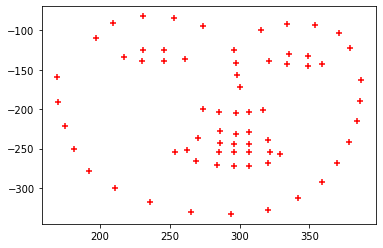

In [0]:
for x,y in landmarks:
  plt.scatter(x,-y,marker='+',c='r')

In [0]:
distance.euclidean(landmarks[36],landmarks[39])

44.04543109109048

In [0]:
def capture_frame(sec):
  start_time=180000
  vid.set(cv2.CAP_PROP_POS_MSEC,start_time+sec*1000)
  res, frame=vid.read()
  return res,frame

In [0]:
def eye_aspect_ratio(eye):
  h=distance.euclidean(eye[0],eye[3])
  v1=distance.euclidean(eye[1],eye[5])
  v2=distance.euclidean(eye[2],eye[4])
  ans=(v1+v2)/(2.0 * h)
  return ans

In [0]:
def mouth_aspect_ratio(mouth):
  h=distance.euclidean(mouth[12],mouth[18])
  v=distance.euclidean(mouth[15],mouth[21])
  ans=v/(h*1.0)
  return ans

In [0]:
def circularity(eye):
    A = distance.euclidean(eye[1], eye[4])
    radius  = A/2.0
    Area = math.pi * (radius ** 2)
    p = 0
    p += distance.euclidean(eye[0], eye[1])
    p += distance.euclidean(eye[1], eye[2])
    p += distance.euclidean(eye[2], eye[3])
    p += distance.euclidean(eye[3], eye[4])
    p += distance.euclidean(eye[4], eye[5])
    p += distance.euclidean(eye[5], eye[0])
    return 4 * math.pi * Area /(p**2)

In [0]:
labels=[]
features=[]

for i in [30]:
  landmarks=[]
  labels=[]
  features=[]

  for j in [0,10]:
    path1 = './'+str(i)+'/'+str(j)+'.mp4'
    path2 = './'+str(i)+'/'+str(j)+'.mov'
    path3 = './'+str(i)+'/'+str(j)+'.MOV'
    path4 = './'+str(i)+'/'+str(j)+'.MP4'
    if  os.path.isfile(path1):
       vid=cv2.VideoCapture('./'+str(i)+'/'+str(j)+'.mp4')
    elif  os.path.isfile(path2):
       vid=cv2.VideoCapture('./'+str(i)+'/'+str(j)+'.mov')
    elif os.path.isfile(path3):
       vid=cv2.VideoCapture('./'+str(i)+'/'+str(j)+'.MOV')
    elif os.path.isfile(path4):
       vid=cv2.VideoCapture('./'+str(i)+'/'+str(j)+'.MP4')
    else :
       vid=cv2.VideoCapture('./'+str(i)+'/'+str(j)+'.m4v')
    time=0
    res,frame= capture_frame(time)
    time+=1
    while(res):
      print(i,j)
      frame_landmarks=extract_face_landmarks(frame)
      if(sum(sum(frame_landmarks))!=0):
        frame_landmarks=frame_landmarks[36:68]
        ear=eye_aspect_ratio(frame_landmarks)
        mar=mouth_aspect_ratio(frame_landmarks)
        circ=circularity(frame_landmarks)
        moe=mar/ear
        labels.append([j/10])
        features.append([ear,mar,circ,moe])

      res,frame=capture_frame(time)
      time+=1

    vid.release()
    cv2.destroyAllWindows()

  labels=np.array(labels)
  features=np.array(features)

  np.save(open('./data/labels_'+str(i)+'.npy','wb'),labels)
  np.save(open('./data/features_'+str(i)+'.npy','wb'),features)
  np.savetxt('./data/features_'+str(i)+'.csv', features, delimiter = ",")
  np.savetxt('./data/labels_'+str(i)+'.csv', labels, delimiter = ",") 

30 0


/usr/local/lib/python3.6/dist-packages/mlxtend/image/extract_face_landmarks.py:61: UserWarning: No face detected.
  warnings.warn('No face detected.')


30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars


30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
30 0
